# Calculating Inflation Rate in Turkey with Official Data 

There is a lot of discussion about the actual inflation rate in Turkey as a lot of people question the accuracy of the official inflation rate calculated by the Turkish Statistical Institute (TUIK). At the beginning of November when the monthly inflation rate and the cumulative inflation rate were published by the institute, someone posted an [entry](https://eksisozluk.com/tuike-gore-enflasyonun-31-31-olmasi--7101397) to EkşiSözlük questioning the accuracy of the calculation. My brother suggested it would be a good project idea to calculate the inflation rate according to the data available on the [TUIK's website](https://data.tuik.gov.tr/Bulten/Index?p=Consumer-Price-Index-November-2021-37389&dil=2). For the purposes of this analysis, I will use "2003 Based Consumer Price Index - Basket and Average Prices" and "Weights for Main Groups and Items of 2003=100 Based Consumer Price Index  (Turkey)", both of which can be downloaded from the Statistical Tables section on the right side of the web page.

2003 Based Consumer Price Index - Basket and Average Prices document will provide the names of the products in the inflation basket along with their price information since January 2003. On the other hand, Weights for Main Groups and Ttems of 2003=100 Based Consumer Price Index (Turkey) document will provide the individual weights of the products in inflation calculation.

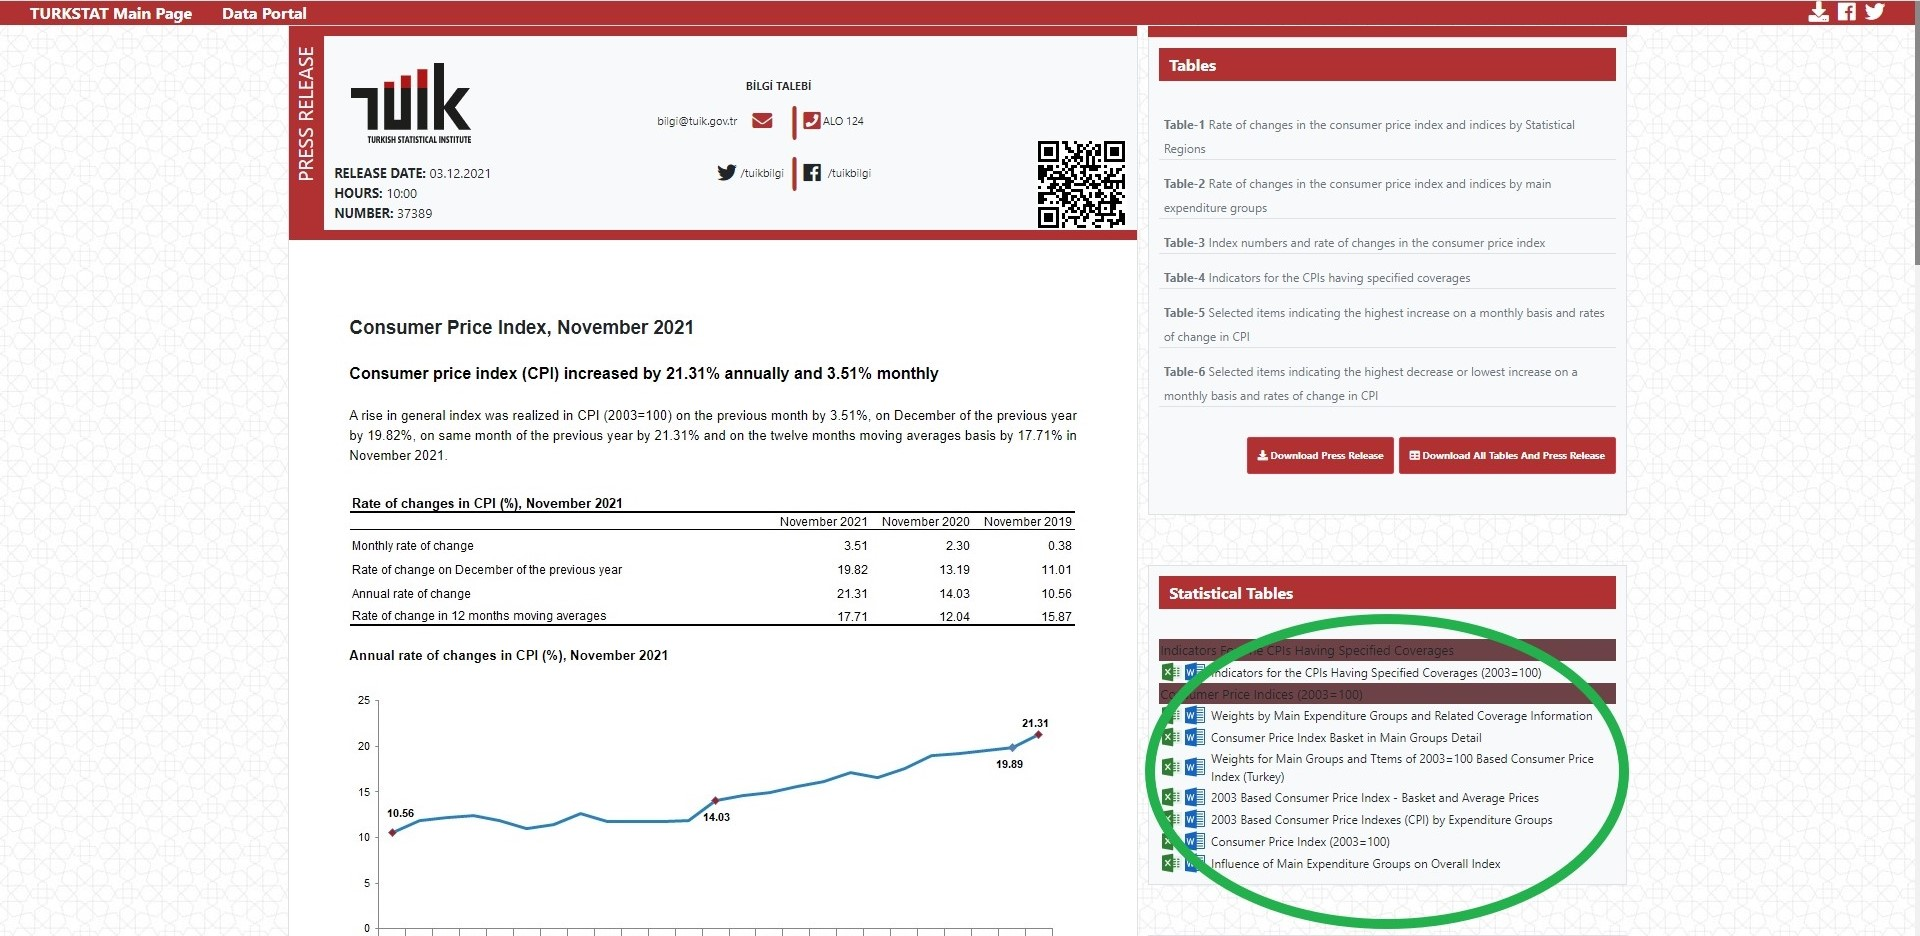

In [1]:
import pandas as pd
import calendar
from matplotlib import pyplot as plt

In [2]:
products = pd.read_excel(
    "2003 Based Consumer Price Index - Basket and Average Prices (1).xls"
)
print(products.columns)

Index(['Tüketici fiyat endeksi (2003=100) madde sepeti ve ortalama fiyatlar (Türkiye)',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 221', 'Unnamed: 222', 'Unnamed: 223', 'Unnamed: 224',
       'Unnamed: 225', 'Unnamed: 226', 'Unnamed: 227', 'Unnamed: 228',
       'Unnamed: 229', 'Unnamed: 230'],
      dtype='object', length=231)


I created a DataFrame object using the first Excel document downloaded from TUIK's website. The document contains price information for 415 different products starting from January 2003 until November 2021. Due to the format of the document, the headers in the Excel document, which display each month, are not seen as headers in our DataFrame object. As you can see above, the names of the columns start with 'Unnamed: 1' and go on until 'Unnamed: 229'.

In [3]:
# the price history starts with January 2003 and has up to date information
# December 2021 figures are available as of 3 January 2022
# let's create new column names in the format of "Month Year" starting
# from January 2003 to December 2021
new_months = []
for i in range(2003, 2022):
    for month in calendar.month_name:
        new_months.append(f"{month} {i}")

# the loop above adds only years as well, manually remove them
for v in new_months:
    if len(v) == 5:
        new_months.remove(v)

# also add the current headers in a list.
# they start with "Unnamed: 1" for Janaury 2003 and
# go until "Unnamed 230" for December 2021
old_months = []
for i in range(3, len(products.columns)):  # start at 3 to start with January 2003
    old_months.append(f"Unnamed: {i}")

# combine the items in the two lists into a dictionary with the
# old headers as keys and new headers as values
months = {}  # combine two lists as a dictionary
for i in range(len(old_months)):
    months[old_months[i]] = new_months[i]

In [4]:
# have to add these three values manually. these are first three column names
months[
    "Tüketici fiyat endeksi (2003=100) madde sepeti ve ortalama fiyatlar (Türkiye)"
] = "Product numbers"
months["Unnamed: 1"] = "Product Names - Turkish"
months["Unnamed: 2"] = "Product Names - English"

As I decided to change the names of the headers, I first created two lists, one of which contains the old header values and the other contains the new header values. I then combined these two into key-value pairs in a dictionary. The first three header names above that list the product number and product names are added to that dictionary manually.

In [5]:
# rename the current headers with the dictionary created above
products.rename(columns=months, inplace=True)

# first four rows were NaN values, so I just dropped them as well
products.drop(labels=range(0, 5), axis=0, inplace=True)

# similarly drop the last six rows, which were NaN
products.drop(products.tail(6).index, inplace=True)

# reset the index numbers as dropping the first 4 rows changed the index numbers
products.reset_index(inplace=True)

With the code piece above, I changed the header name into "Month Year" format starting from January 2003.

In [6]:
products.head(5)

,index,Product numbers,Product Names - Turkish,Product Names - English,January 2003,February 2003,March 2003,April 2003,May 2003,June 2003,...,March 2021,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021
0,5,0111101,Pirinç,Rice,2016210,2035962,2065616,2097533,2117020,2125184,...,12.8479,12.8719,12.9061,12.9645,12.9481,12.9840,13.0078,12.8113,13.0396,14.8318
1,6,0111201,Buğday Unu,Wheat flour,952642,962023,981226,1001251,1010282,1012034,...,5.2122,5.1399,5.2429,5.3005,5.4512,5.3747,5.4669,5.8428,6.6307,9.5536
2,7,0111208,Bebek Maması (Toz Karışım),Baby food,35681369,35706034,35752192,36034235,36137923,36220300,...,142.9032,143.4018,139.6304,141.4540,148.9501,150.5066,151.3812,151.5265,157.4898,166.8686
3,8,0111209,Bulgur,Boiled and pounded wheat,985961,996150,1015331,1041581,1052962,1060421,...,5.9039,5.8578,5.8707,5.9874,6.2007,6.4358,6.5743,6.9804,7.3841,8.9300
4,9,0111301,Ekmek,Bread,1033435,1045493,1068880,1095853,1107608,1119798,...,7.3531,7.3908,7.4895,7.6317,7.8771,8.0266,8.2790,8.4959,9.0969,10.7633


As you can see above, our DataFrame looks quite good now. We have product names in Turkish and English as well as the prices of these products starting from January 2003. Now that I adjusted this DataFrame I can move on to the next document, which contains the weights of these products.

The data in the second document are as important as the prices themselves because this document contains the percentage values for each item, which will be used when calculating the overall inflation rate.

I should also note that the prices until January 2005 may seem too much (for example bread is listed as 1.033.435). The reason is that Turkey dropped 6 zero decimals at the beginning of 2005. More details [here](https://www.dw.com/en/turkeys-money-loses-its-zeros/a-1449780).

In [7]:
# read the second Excel document into weights DataFrame
weights = pd.read_excel(
    "Weights for Main Groups and Ttems of 2003=100 Based Consumer Price Index  (Turkey).xls"
)

# create a new dictionary to rename the second dataframe
rename_weights = {
    "Tüketici fiyat endeksi (2003=100) 2021 yılı ana grup ve madde ağırlıkları (Türkiye)": "Product numbers",
    "Unnamed: 1": "Product Names - Turkish",
    "Unnamed: 2": "Product Names - English",
    "Unnamed: 3": "Weights",
}
weights.rename(columns=rename_weights, inplace=True)

# similarly drop the first three rows
weights.drop(labels=range(0, 4), axis=0, inplace=True)

# # #and then reset the index
weights.reset_index(inplace=True)

In [8]:
weights.head(5)

,index,Product numbers,Product Names - Turkish,Product Names - English,Weights
0,4,0111101,Pirinç,Rice,0.360031
1,5,0111201,Buğday Unu,Wheat flour,0.427137
2,6,0111208,Bebek Maması (Toz Karışım),Baby food,0.109498
3,7,0111209,Bulgur,Boiled and pounded wheat,0.133550
4,8,0111301,Ekmek,Bread,2.474477


The second DataFrame named weights is also ready for use as you can see above. The total value when we sum up the weights for each product will give us 100. Their values are critical in the calculation of the overall inflation rate. 

### Merging Two DataFrames

In [9]:
products["Weights"] = ""
for product in products["Product numbers"]:
    index_weights = weights.loc[weights["Product numbers"] == product]["Weights"].index
    index_products = products.loc[products["Product numbers"] == product][
        "Product numbers"
    ].index
    products.at[index_products, "Weights"] = weights.loc[
        weights["Product numbers"] == product
    ]["Weights"].values

At the moment, I have two separate DataFrames: the first one named products contains the prices and the weights DataFrame contains the proportion of each product in the inflation calculation. I thought it makes more sense to create a new column in the products DataFrame and add the figures from the weights DataFrame makes more sense.

Because there were categorical names in the weights DataFrame (e.g. Food and Non-Alcoholic Beverages, Clothing and Footwear, Furnishings, Household Equipment, Routine Maintenance of the House), which are the total value of the products in their respective sub-categories, I couldn't just copy the entire column and paste in the products DataFrame. I first used the Product Names in English and Turkish but later realized that they are not exactly the same. After long hours trying to find out the problem I decided to use Product numbers, which should have been the way to go from the beginning. I first created a new column in the products DataFrame and copied the weight value of the corresponding product to the individual cell for each product. Now all the information I need is in the products DataFrame.

In [10]:
products_with_NaN = products[products['November 2020'].isna()]
products_with_NaN

,index,Product numbers,Product Names - Turkish,Product Names - English,January 2003,February 2003,March 2003,April 2003,May 2003,June 2003,...,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021,Weights
94,99,0117504,Turşu,Pickle,NaN,NaN,NaN,NaN,NaN,NaN,...,13.8881,14.2613,14.2203,14.3554,15.2157,16.1186,16.5523,17.408,18.0559,0.033706
161,166,0312223,Sweatshirt (Kadın için),Women's sweatshirt,NaN,NaN,NaN,NaN,NaN,NaN,...,78.9923,79.2562,80.4990,79.2528,81.8326,95.0012,115.7573,116.715,121.8342,0.029977


It seems two products listed above (Pickle and Women's sweatshirt) has NaN for their November 2020 value, which makes is impossible to see the price difference from November 2020 to November 2021. 

In [11]:
products[products['November 2021'] == 0]

,index,Product numbers,Product Names - Turkish,Product Names - English,January 2003,February 2003,March 2003,April 2003,May 2003,June 2003,...,April 2021,May 2021,June 2021,July 2021,August 2021,September 2021,October 2021,November 2021,December 2021,Weights
39,44,0116102,Üzüm,Grape,0,0,0,0,0,0,...,0,0,0,0,8.7498,7.8876,8.0610,0,0,0.141918
42,47,0116110,Çilek,Strawberry,0,0,0,1824888,1703076,1599795,...,14.4602,15.0951,13.8122,0,0,0,0,0,0,0.076921
44,49,0116121,Karpuz,Water melon,0,0,0,0,0,473917,...,0,0,1.5037,1.7091,2.0807,2.1746,0,0,0,0.266580
45,50,0116122,Kavun,Melon,0,0,0,0,0,0,...,0,0,0,3.1675,3.5574,3.3478,3.3672,0,0,0.116868
46,51,0116123,Kayısı,Apricot,0,0,0,0,0,1636765,...,0,0,11.5816,13.4487,13.4487,0,0,0,0,0.039875
47,52,0116127,Kiraz,Cherry,0,0,0,0,4098613,1888430,...,0,0,13.4887,12.3658,12.3658,0,0,0,0,0.075622
53,58,0116137,Şeftali,Peach,0,0,0,0,0,1821387,...,0,0,10.5291,11.2127,11.6228,9.8434,0,0,0,0.077578
69,74,0117125,Taze Fasulye,Green bean,0,0,0,0,1898160,1399927,...,14.7976,9.6338,8.5404,7.9212,10.5184,10.7675,10.2913,0,0,0.123340
147,152,0312117,Tişört (Erkek için),Men's t-shirt,0,0,0,28426424,29915597,30001606,...,65.6148,67.3801,69.7748,68.8473,64.9746,63.4587,0,0,0,0.187921
162,167,0312224,Tişört (Kadın için),Women's t-shirt,21495011,21687809,21771644,23014537,24387188,24641555,...,48.7506,50.3874,52.4804,51.3249,49.8985,49.1572,0,0,0,0.240777


As mentioned in the EkşiSözlük [entry](https://eksisozluk.com/tuike-gore-enflasyonun-31-31-olmasi--7101397) no price data is available for some products in either December 2020 or in December 2021 or in both. As you can see above these are mostly summer fruits or t-shirts. For example, grape prices are listed for only three months and peach prices are listed for four months.

### Calculating Inflation Between Two Months

In [12]:
def inflation_between_months(df, first_month, second_month):
    """This function calculates the inflation between two dates. The first input is 
    name of the DataFrame with the product prices and their weights. The second and 
    third input are the months that are subject to calculation. The months should be 
    added in following format 'November 2020' and 'November 2021'. The function 
    does not check whether the first month is actually before the second month"""
    first_value = df.columns.get_loc(first_month)
    second_value = df.columns.get_loc(second_month)
    inflation_between_dates = 0
    for i in range(len(products.index)):
        # check if first value has NaN value otherwise add one to the index until a valid float is encountered
        # this is the case for products added to the basket at the beginning of each year as they don't have price
        # information earlier
        if pd.isnull(df.loc[i][first_month]):
            first_column = first_value
            while pd.isnull(df.loc[i][first_column]):
                first_column += 1
            increase = df.iloc[i, second_value] - df.iloc[i, first_column]
            increase_percentage = (increase / df.iloc[i, first_column]) * 100.0
            product_inflation = (df.iloc[i, -1] * increase_percentage) / 100.0
            inflation_between_dates += product_inflation
        # the prices of some seasonal products are listed as 0 for a few months throughout the year
        # this condition checks whether the first value or second value has 0 and moves to next/previous
        # month until a valid number is reached
        elif df[first_month][i] == 0 or df[second_month][i] == 0:
            first_price = first_value
            while (
                df.loc[i][first_price] == 0
            ):  # catch the products with the first price listed as zero
                first_price += 1
            second_price = second_value
            while (
                df.loc[i][second_price] == 0
            ):  # catch the products with the last price listed as zero
                second_price -= 1
            increase = df.loc[i][second_price] - df.loc[i][first_price]
            increase_percentage = (increase / df.loc[i][first_price]) * 100.0
            product_inflation = (df.iloc[first_price][-1] * increase_percentage) / 100.0
            inflation_between_dates += product_inflation
        else:
            increase = df.iloc[i, second_value] - df.iloc[i, first_value]
            increase_percentage = (increase / df.iloc[i, first_value]) * 100.0
            product_inflation = (df.iloc[i, -1] * increase_percentage) / 100.0
            inflation_between_dates += product_inflation
    return inflation_between_dates

In [13]:
def inflation_between_months_lite(df, first_month, second_month):
    """This function calculates the inflation between two dates. The first input is 
    name of the DataFrame with the product prices and their weights. The second and 
    third input are the months that are subject to calculation. The months should be 
    added in following format 'November 2020' and 'November 2021'. The function 
    does not check whether the first month is actually before the second month"""
    first_value = df.columns.get_loc(first_month)
    second_value = df.columns.get_loc(second_month)
    inflation_between_dates = 0
    for i in range(len(products.index)):
        if pd.isnull(df.loc[i][first_month]):
            pass
        elif df[first_month][i] == 0 or df[second_month][i] == 0:
            pass
        else:
            increase = df.iloc[i, second_value] - df.iloc[i, first_value]
            increase_percentage = (increase / df.iloc[i, first_value]) * 100.0
            product_inflation = (df.iloc[i, -1] * increase_percentage) / 100.0
            inflation_between_dates += product_inflation
    return inflation_between_dates

In [14]:
inflation_between_months(products, "December 2020", "December 2021")

46.51665517836885

In [15]:
inflation_between_months_lite(products, "December 2020", "December 2021")

46.55024227872208

You can see above I created two different functions to calculate inflation between two months. The first one inflation_between_months() considers the next available price when the function encounters any NaN or 0 values of a product. For example, grape prices are available only three months within a year and this function considers the change in these three months in the overall calculation. 

However, the second function inflation_between_months_lite() skips any NaN and 0 values encountered and just calculates the prices of the product prices that are available in both months.

As you can see from above, the difference in the calculation is very minor with nearly 0.04%.

In [16]:
inflation = "{:.2f}".format(inflation_between_months(products, "December 2020", "December 2021"))
print(inflation)

46.52


After leaving two decimal points, the inflation rates between selected dates turned out to be 46.52%, which is more than 10% higher than the official 36.08% announced for December 2021 in this [link](https://data.tuik.gov.tr/Bulten/Index?p=Consumer-Price-Index-December-2021-45789&dil=2). I am not sure about the reason for this huge difference but my guess is that they may use the 0 values in seasonal products in a way to decrease the numbers. However, it is not possible to know the exact reason as the metadata in the above link does not provide any detailed information

### Monthly Inflation Increase

I also want to create plot showing the inlation rate for each month from one point to the other.

In [28]:
def monthly_inflation_between_months(df, first_month, second_month):    
    first_value = df.columns.get_loc(first_month)
    second_value = df.columns.get_loc(second_month)
    months = []
    inflation_rate = []
    monthly = 0
    for v in range(first_value, second_value):
        for i in range(len(products.index)):
            if pd.isnull(df.loc[i][v]):
                pass # if that month's price is missing, it is not possible to calculate, so I skip
            elif df.loc[i][v+1] == 0 or df.loc[i][v] == 0:
                pass # if that month's or the next month's price is listed as 0, it is not possible to calculate, so I skip
            else:
                increase = (df.loc[i][v+1]) - (df.loc[i][v])
                increase_pct = (increase / df.loc[i][v]) * 100.0
                inflation = (df.iloc[i, -1] * increase_pct) / 100.0
                monthly += inflation
        inflation_rate.append(monthly)
        months.append(products.columns[v+1])
    return inflation_rate, months

The function above operates similar to the functions above, it receives a DataFrame and two different dates as input. Then it calculates the monthly inflation rate for each month from the first date to second date and stores them in two separate lists. One list contains the inflation rates and the other contains the corresponding months. 

As this is a monthly calculation, if a particular product's price is listed as 0 or NaN in that month, the function skips that product.

Text(0.5, 1.0, 'Inflation Rate Change Through Months')

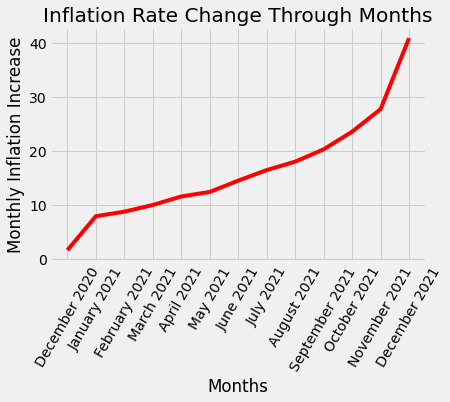

In [27]:
plt.style.use("fivethirtyeight")

inflation = monthly_inflation_between_months(
    products, "November 2020", "December 2021")[0]

months = monthly_inflation_between_months(
    products, "November 2020", "December 2021")[1]

plt.plot(months, inflation, color="red", label="Inflation")

plt.xticks(rotation=60)
plt.xlabel("Months")
plt.ylabel("Monthly Inflation Increase")
plt.title("Inflation Rate Change Through Months")

I should note that this monthly calculation is slightly different than the inflation calculation above that calculate inflation between two dates. This function starts from zero and adds each month's inflation in a cumulative way until the second date is reached. 

Here we can see a continuous increase throughout 2021, which can be explained by the devaluation of Turkish Lira against other currencies and the sharp increase at the end of 2021 is the time when we observed a nearly 35% devaluation in the first three weeks of December 2021. 

I'm curious to see the January 2022 inflation rates following some valuation of the Turkish Lira at the end of 2021.